<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/RMSprop_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

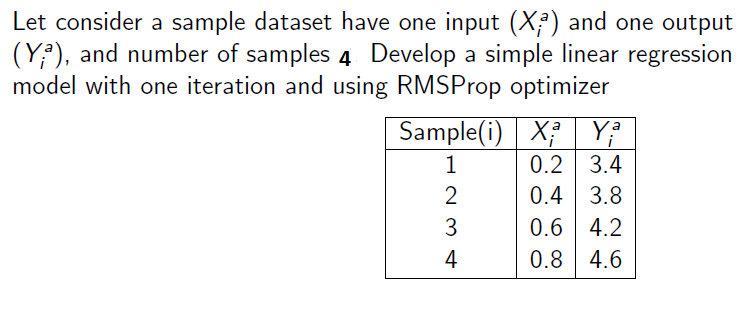

**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata.csv')
data.head()

,X,Y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


**Data Normalization**

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.20, random_state = 10)

**Initialization**

In [5]:
m = random.uniform(-10,10) #Initial value of slope
c = random.uniform(-10,10) #Initial value of intercept
eta = 0.002 #Learning Rate
gama=0.9
edasg_m = 0
edasg_c = 0
max_iter = 10000 #Maximum number of iterations
eps=mt.pow(10,-8)

**Gradient Calculation**

In [6]:
def gradient(m_f, c_f, x, y):
  m_deriv = -1*(y-m_f*x-c_f)*x
  c_deriv = -1*(y-m_f*x-c_f)
  return m_deriv, c_deriv

**Model Training**

In [7]:
for iter in range(max_iter):
  del_m,del_c=0.0,0.0
  for sample in range(x_train.shape[0]):
    delm,delc=gradient(m,c,x_train.iloc[sample], y_train.iloc[sample])
    del_m=del_m+delm
    del_c=del_c+delc
  del_m=del_m/len(x_train)
  del_c=del_c/len(x_train)
  edasg_m=gama*edasg_m+(1-gama)*(del_m*del_m)
  edasg_c=gama*edasg_c+(1-gama)*(del_c*del_c)
  m=m-(eta*del_m)/(mt.sqrt(edasg_m+eps))
  c=c-(eta*del_c)/(mt.sqrt(edasg_c+eps))
  #print(f"Iteration: {iter}\tValue of m: {m}, \tValue of c: {c}")

print(f"\nThe local minima occurs at: {m}, {c}")


The local minima occurs at: 2.0009910658214682, 3.000997663077078


**Training MSE**

In [8]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

2.1931839500916765e-06

**Testing MSE**

In [9]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q2
error

8.451424914325761e-07

**Model Deployment**

In [10]:
X=input('enter X value')
Y=m*float(X)+c
print('Y=',Y)

enter X value0.2
Y= 3.401195876241372


# **Assignment**

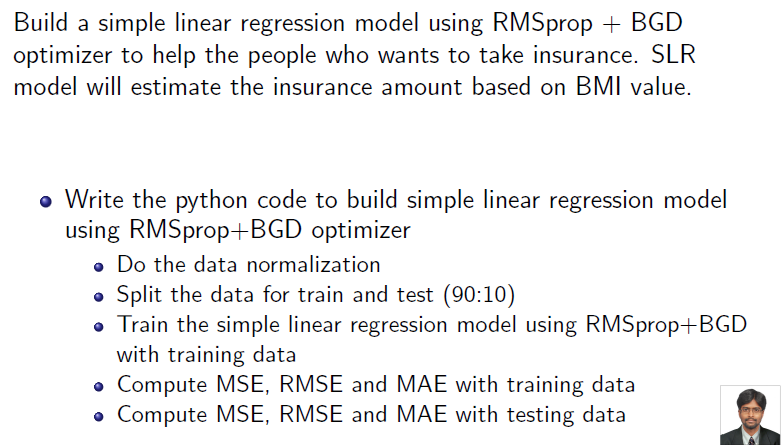

# **Thank You**